In [972]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [973]:
# Input Variable
firs_population_size = 10
# Generation Size
Generation_size = 100
# Elitism Rate
Elitism_rate = 0.05
#CrossOver Rate
Crossover_rate = .1
#Mutation Rate
Mutation_rate = .1
# peanlty Coeficent
alpha = np.random.random()
# counts of all elemnts
elemets_len = np.random.randint(2,20) 
# Generate Random weights for Test
weights = list( np.random.uniform(1, 5, size= elemets_len) )
# Generate Random values for Test
values  = list( np.random.uniform(20, 30, size= elemets_len) )
# Generate Random knapsack for Test
knapsack_capacity = np.random.randint(50,100)

# Whats the data
print("peanlty Coeficent: ", alpha)
print("knapsack_capacity: ", knapsack_capacity)
print("count of all elememts", elemets_len)
print("weights: ", weights)
print("values: ", values)
print("total weights: ", sum(values))
print("total values: ", sum(values))

peanlty Coeficent:  0.14131047348766423
knapsack_capacity:  71
count of all elememts 17
weights:  [4.921275296142878, 4.707890616548474, 3.5607492242390566, 2.8076265306573025, 3.1702221251037725, 3.7212549138600086, 3.68341723846749, 4.962318338512891, 1.0593166057473336, 4.363542902094378, 2.9489964162920965, 4.141297181635333, 2.197142633755294, 4.229571715437722, 3.8338575651923787, 4.159992657145098, 2.6192939417610885]
values:  [20.9135267386488, 29.4458324279327, 28.725569499469756, 25.694842371968658, 27.694452132823578, 27.542468115218764, 20.92877781063955, 25.09309242037198, 27.835701488351624, 27.861978807345185, 29.775583287399122, 29.35469964254616, 22.42421546011608, 27.158940569833018, 20.101154557498198, 24.625748856965906, 24.811195562218884]
total weights:  439.98777974934796
total values:  439.98777974934796


In [974]:
# Generate initial population
def generate_individual():
    return [np.random.choice([0, 1]) for _ in range(len(weights))]

# Function to initialize a population of chromosomes
def initialize_population(size):
    return [generate_individual() for _ in range(size)]

![Alt text](image.png)

In [975]:
# Evaluate fitness of an individual
def fitness(individual : list, 
            weights : list, 
            values : list, 
            penalty_rate : list,
            Q : float) -> float:
  """Evaluates the fitness of a given individual.
  Args:
  individual (list): The individual to evaluate.
  weights (list): List of weights for each value in the individual.
  values (list): List of possible values that can be used in the individual.
  penalty_rate (float): Penalty rate applied if there are any violations.
  Q (float): Quality factor.
  Returns:
  float: Fitness score of the individual.
  """


  total_values = np.sum(np.array(individual) * values)
  total_weights = np.sum(np.array(individual) * weights)
  Beta = total_weights - Q
  penalty_rate = (1 - 2 * Beta) / total_values #if total_values > 0 else penalty_rate 
  
  fit = total_values - penalty_rate * max(0, Beta )
  return fit
  # if fit <= Q:
  #   return fit
  
  # else:
  #   return 0.



In [976]:
def elitism(*,population : list, fitness_values : list , Q : float ,elitism_rate : float = 0.2 ):
    """
    This function implements the elitism operator in a genetic algorithm. It takes as input:
    - population (list of chromosomes)
    - fitness_values (list of floats representing the corresponding fitness values for each chromosome in the population)
    - Q (float between 0 and 1 that represents the mutation rate)
    - elitism_rate (optional parameter to define how many individuals will be selected from the current generation)"""

    population = population.copy()
    fitness_values = fitness_values.copy()
    elite_size = int(round(len(population) * elitism_rate,0))
    elits = []
    idxs = np.argmax(fitness_values), elite_size

    for idx in idxs:
        # if fitness_values[idx] <= Q:
        elits.append(population[idx])


    return elits

In [977]:
# Function to select individuals for reproduction using roulette wheel python
def Roulette_Wheel_Selection( fitness_values : list[float]) -> int:
    np.nan = 0
    sum_of_fitness = sum(fitness_values)

    probabilitse = [ f / sum_of_fitness for f in fitness_values  ]
    

    # print(sum(probabilitse))
    if sum(probabilitse) == 1. or  sum_of_fitness == np.nan:
        spin = np.random.choice(probabilitse, size  = 2,  p = probabilitse)
    else:
        spin = np.random.choice(probabilitse, size  = 2)
        # print(spin)
        # print(probabilitse.index(spin[0]))
    return probabilitse.index(spin[0]), probabilitse.index(spin[1])




In [978]:
def crossover(parent_1, parent_2):
    """
    This function takes two parents and produces a child by performing the crossover operation.
    The crossover point is chosen randomly between 0 and length of string - 1.
    After that, we take half characters from first parent before crossover point and second half after it.
    Then, we concatenate these halves to form the new offspring.
    params: 
        - parent_1: str, first parent's genes
        - parent_2: str, second parent's genes
    :return: str, offspring's genes
    
    """
    crossover_point = np.random.randint(0, len(parent_1) - 1)
    # parent1 = list(parent1)
    # parent2 = list(parent2)
    child1 = parent_1[:crossover_point] + parent_2[crossover_point:]
    child2 = parent_2[:crossover_point] + parent_1[crossover_point:]
    return child1, child2

# Function to apply mutation to an individual (flip bit)
def mutate(individual, mutation_rate):
    individual = individual.copy() 
    mutation_point = np.random.randint(0, len(individual) - 1)
    # for index in range(len(individual)):
    if np.random.random() < mutation_rate:
        if individual[mutation_point] == 1:
            individual[mutation_point] = 0
            
        elif individual[mutation_point] == 0:
            individual[mutation_point] = 1
                
    return individual

In [979]:
# Main genetic algorithm loop
def genetic_algorithm(*,values : list[float],
                      weights: list[float], 
                      init_population_size : int, 
                      generation_size : int,
                      KN_capacity : float,
                      elitism_rate : float,
                      crossover_rate : float , 
                      mutation_rate : float, 
                      penalty_coef : float,
                      print_data : bool = True,
                      show_fitness_graph : bool = True ) -> tuple[list, float] :

    
    values = values.copy()
    weights = weights.copy()
    init_population = initialize_population(init_population_size)
    new_population = list()
    best_gen_fit            = []
    avg_gen_fit             = []
    all_fitness = list()
    # for generation in range(generation_size):
    fitness_values = [fitness(indivisual,weights,
                        values, penalty_coef, KN_capacity) 
                        for indivisual in init_population]
    while True:
        if sum(fitness_values) <= 0 or sum(fitness_values) == np.nan:
            print("All individuals have zero fitness")
            init_population = initialize_population(init_population_size)
            fitness_values = [fitness(indivisual,weights,
                        values, penalty_coef, KN_capacity) 
                    for indivisual in init_population]
        else: 
            break
    # print(fitness_values)

    elits = elitism(population = init_population, fitness_values = fitness_values, elitism_rate = elitism_rate, Q= KN_capacity)

    new_population.extend( elits)
    # for _ in init_population:
    while not len(new_population) >= init_population_size:
        # Apply crossover to generate two children
        if np.random.random() <= crossover_rate:
            spin_roll_1, spin_roll_2 = Roulette_Wheel_Selection(fitness_values)
            parent_A : list = init_population[spin_roll_1]
            parent_B : list = init_population[spin_roll_2]
            child1, child2 = crossover(parent_A, parent_B)  
            # Apply mutation to each child
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            # Put the two mutated children into the new population
            fit_child_1 = fitness(child1,weights,
                        values,penalty_coef, KN_capacity)
            fit_child_2 = fitness(child2,weights,
                                values,penalty_coef, KN_capacity)
            # if new childrenare feasible
            if fit_child_1 > 0:
                new_population.append(child1)
                all_fitness.append(fit_child_1)
            if fit_child_2 > 0:
                new_population.append(child2)
                all_fitness.append(fit_child_2 )
                
            best_fitness = [fitness(new_pop, weights,
                        values, penalty_coef, KN_capacity) for new_pop in new_population]
            best_gen_fit.append(np.max(best_fitness))
            avg_gen_fit.append(sum(best_fitness)/init_population_size)
                    


    
    best_index = np.argmax(best_fitness)
    best_child : list = new_population[best_index]
    wk = sum( best_child[i] * weights[i] 
                                    for i in range(len(weights)))
    is_feasible = "✅" if wk <= KN_capacity else "❌"

    if print_data:
        print(f"""
            # population Size   {len(new_population)}
            {penalty_coef}
        we have {len(weights)} elements
        weights : {weights}
        values : {values}
        Best solution found by GA is  {best_child}
        with mean fitness of {np.mean(best_fitness)}
        weight of knapsacak: {wk}
        knapsacak capacity: {KN_capacity} {"✅" if wk <= KN_capacity else "❌"}
    """)
    if show_fitness_graph :
        # plt.figure(figsize=(15, 10) )
        sns.lineplot(best_gen_fit , label = "best gen fitness")
        plt.xlabel("Generation")
        plt.ylabel("Fitness value")
        sns.lineplot(avg_gen_fit, label = "all over Gen")
        plt.legend()
        plt.grid()
        plt.show()

    return best_child, best_gen_fit, is_feasible 




            # population Size   10
            0.14131047348766423
        we have 17 elements
        weights : [4.921275296142878, 4.707890616548474, 3.5607492242390566, 2.8076265306573025, 3.1702221251037725, 3.7212549138600086, 3.68341723846749, 4.962318338512891, 1.0593166057473336, 4.363542902094378, 2.9489964162920965, 4.141297181635333, 2.197142633755294, 4.229571715437722, 3.8338575651923787, 4.159992657145098, 2.6192939417610885]
        values : [20.9135267386488, 29.4458324279327, 28.725569499469756, 25.694842371968658, 27.694452132823578, 27.542468115218764, 20.92877781063955, 25.09309242037198, 27.835701488351624, 27.861978807345185, 29.775583287399122, 29.35469964254616, 22.42421546011608, 27.158940569833018, 20.101154557498198, 24.625748856965906, 24.811195562218884]
        Best solution found by GA is  [0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
        with mean fitness of 242.8459329593498
        weight of knapsacak: 41.082332219792825
        knapsacak ca

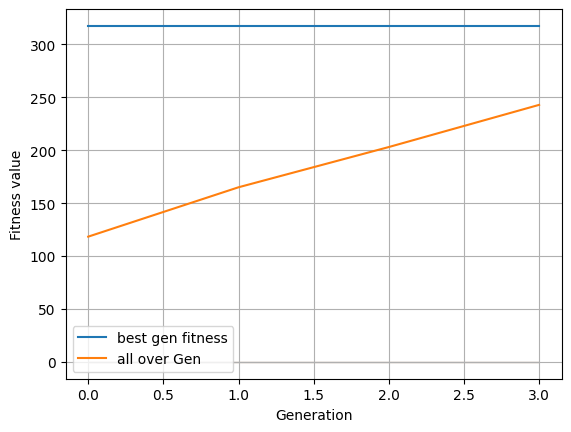

In [980]:
best_child, all_fitness,_ = genetic_algorithm(init_population_size = firs_population_size,
                                             values= values,
                                             weights= weights,
                                             generation_size = Generation_size,
                                             KN_capacity= knapsack_capacity,
                                             elitism_rate= Elitism_rate,
                                             crossover_rate= Crossover_rate,
                                             mutation_rate= Mutation_rate, 
                                            penalty_coef = alpha,
                                            show_fitness_graph = True)



# print(all_fitness)

In [981]:
total_fitness = []
best_answr = []
for iter in range(30):
    best_child, all_fitness,  is_feasible = genetic_algorithm(init_population_size = firs_population_size,
                                             values= values,
                                             weights= weights,
                                             generation_size = Generation_size,
                                             KN_capacity= knapsack_capacity,
                                             elitism_rate= Elitism_rate,
                                             crossover_rate= Crossover_rate,
                                             mutation_rate= Mutation_rate, 
                                            penalty_coef = alpha,
                                            print_data = False,
                                            show_fitness_graph= False)
    

    total_fitness.append(np.mean(all_fitness))
    best_answr.append([best_child, is_feasible])


In [982]:
best_answr

[[[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], '✅'],
 [[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], '✅'],
 [[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], '✅'],
 [[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], '✅'],
 [[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], '✅'],
 [[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], '✅'],
 [[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], '✅'],
 [[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], '✅'],
 [[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], '✅'],
 [[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], '✅'],
 [[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], '✅'],
 [[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1], '✅'],
 [[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], '✅'],
 [[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], '✅'],
 [[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], '✅'],
 [[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], '✅'],
 [[1, 0, 1, 1, 1, 1, 0, 

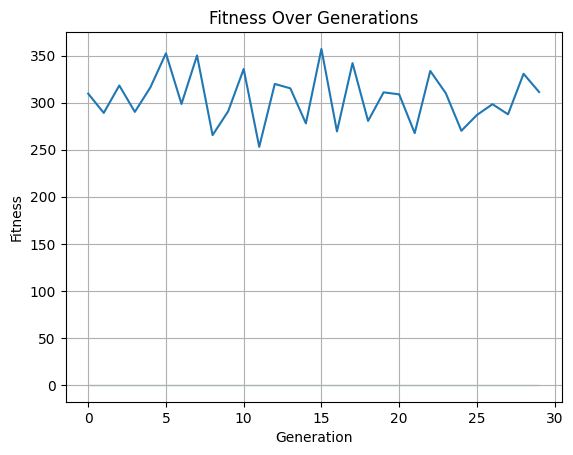

In [983]:
# Plot mean fitness values
# plt.figure(figsize=(15, 10) )
sns.lineplot(total_fitness, legend= False)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations')
plt.grid()
plt.show()